本章主要聚焦于聚类分析，它是一种无监督学习技术。其目的在于在数据中找到一个自然的分组，以便使同一簇(clustering)中的样本具有相同的模式，即更加相似。

#### 使用K-means方法按照相似度对对象进行分组

##### 使用sklearn进行k-means聚类

K-means算法属于基于原型的聚类方法(prototype-base clusting.) 本小节还将讨论另外两种聚类方法，`分层聚类和基于密度的聚类`。

* 其中，基于原型的聚类意味着每一个簇(cluster)都由一个原型(prototype)表示, 原型通常是具有连续特征的相似点的质心(centroid)(或者说均值)， 又或者是在类别型特征情况下的中心点(medoid)(最具有代表性的点或者是到当前簇内所有其他点距离最小化的点.) `这种聚类方法的缺点之一是必须人为指定聚类个数K`.

以下是一个使用K-means方法进行二维数据聚类的示例：

* Step1: 从样本中随机挑选$k$个质心(centroids)作为初始聚类中心；
* Step2: 将每个样本分配给最近的质心$\mu^{(j)}$， $j\in{1, ..., k}$;
* Step3: 将质心移动到分配给他的示例的中心；
* Step4：重复步骤2、3直到质心不再改变或者达到用户定义的容差(tolerance)或者最大迭代次数；

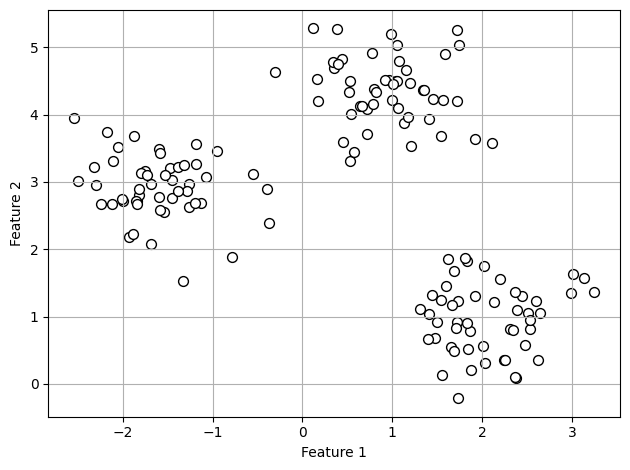

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', 
            marker='o', 
            edgecolors='black', 
            s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

所以，衡量上述提到的最相似或最近，常用的criteria是欧式距离(平方)：

$$d(\boldsymbol{x},\boldsymbol{y})^2=\sum_{j=1}^m\bigl(x_j-y_j\bigr)^2=\Vert \boldsymbol x-\boldsymbol y\Vert_2^2$$

所以，根据上述欧氏距离指标，可以将$k$均值算法视为一个优化问题，即一种最小化簇内误差平方和的迭代方法(有时候也称为cluster inertia)：

$$SSE=\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)}\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(j)}\right\|_2^2$$

其中，$\boldsymbol{\mu}^{(j)}$代表第$j$个质心(centroid). $w^{(i,j)}=1$,则对应说明样本$\boldsymbol x^{(i)}$属于第$j$个簇，否则为0：

$$w^{(i,j)}=\begin{cases}1,&\text{if}\quad \boldsymbol x^{(i)}\in j\\0,&\text{otherwise}\end{cases}$$

In [4]:
# 使用sklearn实现.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10,      # 独立运行K-means10次，使用不同的随机质心来选择具有最低SSE的模型.
            max_iter=300, 
            tol=1e-04,      # 容差参数.
            random_state=0)
y_km = km.fit_predict(X)

In [5]:
# 可视化聚类结果.
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to 